In [28]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np
from Wind.Config import wind_data, wind_data_ext, wind_path
import statsmodels.api as sm
from __future__ import division
%matplotlib inline

In [29]:
nc_fid = Dataset("/home/bejar/storage/Data/Wind/files/0/0.nc", 'r')

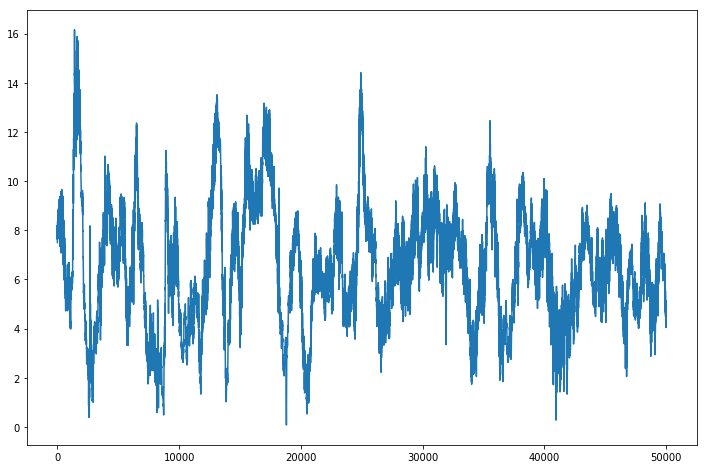

In [65]:
tseries = nc_fid.variables['wind_speed'][0:50000]
fig = plt.figure(figsize=(12,8))
plt.plot(tseries)

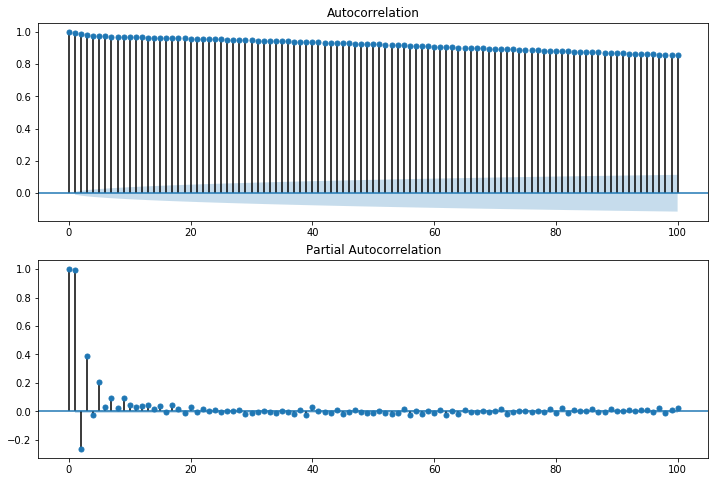

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tseries, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tseries, lags=100, ax=ax2)

In [83]:
arma_mod = sm.tsa.ARMA(tseries, (2,2)).fit()

In [84]:
print arma_mod.aic, arma_mod.bic, arma_mod.hqic
arma_mod.summary()

-5269.4345075 -5216.51583779 -5252.85799812


<table class="simpletable">
<caption>ARMA Model Results</caption>
<tr>
  <th>Dep. Variable:</th>         <td>y</td>        <th>  No. Observations:  </th>   <td>50000</td>  
</tr>
<tr>
  <th>Model:</th>            <td>ARMA(2, 2)</td>    <th>  Log Likelihood     </th> <td>2640.717</td> 
</tr>
<tr>
  <th>Method:</th>             <td>css-mle</td>     <th>  S.D. of innovations</th>   <td>0.230</td>  
</tr>
<tr>
  <th>Date:</th>          <td>Tue, 27 Jun 2017</td> <th>  AIC                </th> <td>-5269.435</td>
</tr>
<tr>
  <th>Time:</th>              <td>15:47:48</td>     <th>  BIC                </th> <td>-5216.516</td>
</tr>
<tr>
  <th>Sample:</th>                <td>0</td>        <th>  HQIC               </th> <td>-5252.858</td>
</tr>
<tr>
  <th></th>                       <td> </td>        <th>                     </th>     <td> </td>    
</tr>
</table>
<table class="simpletable">
<tr>
     <td></td>        <th>coef</th>     <th>std err</th>      <th>z</th>      <th>P>|z|</th>  <th>[0.025</th>    <th>0.975]</th>  
</tr>
<tr>
  <th>const</th>   <td>    6.4783</td> <td>    0.470</td> <td>   13.781</td> <td> 0.000</td> <td>    5.557</td> <td>    7.400</td>
</tr>
<tr>
  <th>ar.L1.y</th> <td>    1.5508</td> <td>    0.006</td> <td>  257.770</td> <td> 0.000</td> <td>    1.539</td> <td>    1.563</td>
</tr>
<tr>
  <th>ar.L2.y</th> <td>   -0.5512</td> <td>    0.006</td> <td>  -91.822</td> <td> 0.000</td> <td>   -0.563</td> <td>   -0.539</td>
</tr>
<tr>
  <th>ma.L1.y</th> <td>   -0.2061</td> <td>    0.005</td> <td>  -39.229</td> <td> 0.000</td> <td>   -0.216</td> <td>   -0.196</td>
</tr>
<tr>
  <th>ma.L2.y</th> <td>   -0.5879</td> <td>    0.004</td> <td> -166.463</td> <td> 0.000</td> <td>   -0.595</td> <td>   -0.581</td>
</tr>
</table>
<table class="simpletable">
<caption>Roots</caption>
<tr>
    <td></td>   <th>           Real</th> <th>         Imaginary</th> <th>         Modulus</th> <th>        Frequency</th>
</tr>
<tr>
  <th>AR.1</th>               1.0010                    +0.0000j                    1.0010                    0.0000     
</tr>
<tr>
  <th>AR.2</th>               1.8125                    +0.0000j                    1.8125                    0.0000     
</tr>
<tr>
  <th>MA.1</th>               1.1406                    +0.0000j                    1.1406                    0.0000     
</tr>
<tr>
  <th>MA.2</th>              -1.4913                    +0.0000j                    1.4913                    0.5000     
</tr>
</table>

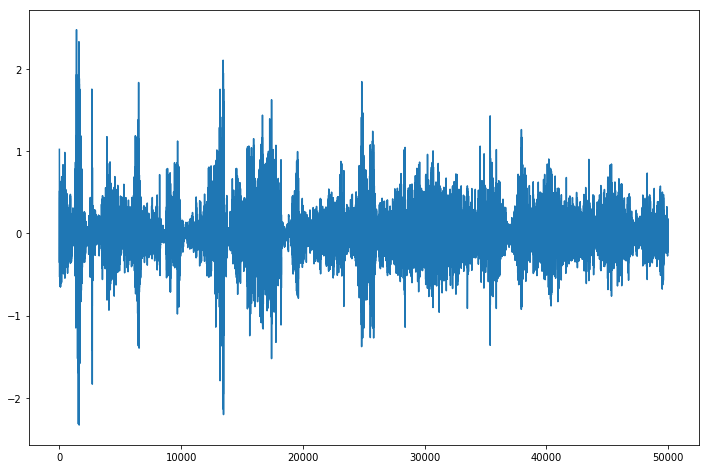

In [85]:
sm.stats.durbin_watson(arma_mod.resid)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
plt.plot(arma_mod.resid)

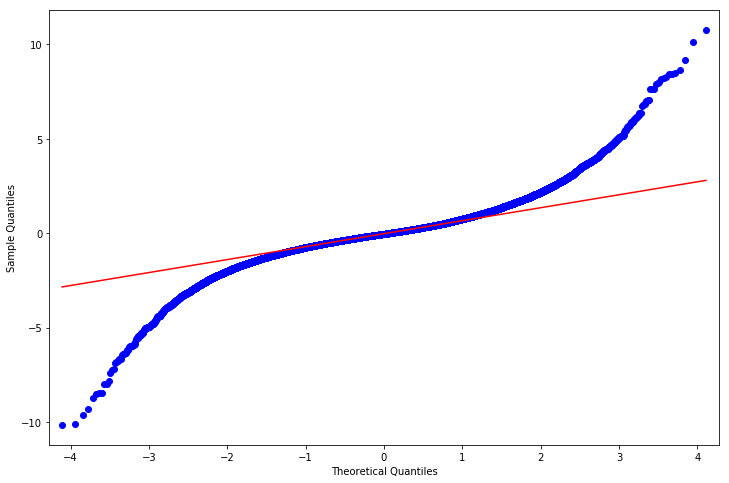

In [86]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = sm.qqplot(arma_mod.resid, line='q', ax=ax, fit=True)